### 1️⃣ Nível Iniciante – Exploração e Visualização

### Análise exploratória (EDA):

* Distribuição de idades, saldos médios, tipos de profissão, escolaridade.

* Percentual de clientes que aceitaram o depósito (deposit = yes/no).

* Relação entre saldo, empréstimos, financiamento e aceitação do depósito.

### Gráficos:

* Histogramas de idade, saldo, duração da ligação.

* Gráficos de barras para variáveis categóricas (job, education, marital).

* Heatmap de correlação entre variáveis numéricas.

### Insights simples:

* Descobrir quais grupos etários ou profissões mais aceitam o depósito.

* Ver se a duração da ligação influencia na aceitação.


In [1]:
# Imports.
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# Visualizando os dados pela primeira vez.
df_bank = pd.read_csv('../data/raw/bank.csv')
df_bank.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown,yes
1,56,admin.,married,secondary,no,45,no,no,unknown,5,may,1467,1,-1,0,unknown,yes
2,41,technician,married,secondary,no,1270,yes,no,unknown,5,may,1389,1,-1,0,unknown,yes
3,55,services,married,secondary,no,2476,yes,no,unknown,5,may,579,1,-1,0,unknown,yes
4,54,admin.,married,tertiary,no,184,no,no,unknown,5,may,673,2,-1,0,unknown,yes


In [18]:
df_bank['deposit'].value_counts(normalize=True)

deposit
no     0.52616
yes    0.47384
Name: proportion, dtype: float64

In [3]:
# Resumo: EDA = olhar para os dados, entender estatísticas e padrões iniciais, fazer comparações, identificar problemas, outliers e tendências.
df_bank.describe()

,age,balance,day,duration,campaign,pdays,previous
count,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000
mean,41.231948,1528.538524,15.658036,371.993818,2.508421,51.330407,0.832557
std,11.913369,3225.413326,8.420740,347.128386,2.722077,108.758282,2.292007
min,18.000000,-6847.000000,1.000000,2.000000,1.000000,-1.000000,0.000000
25%,32.000000,122.000000,8.000000,138.000000,1.000000,-1.000000,0.000000
50%,39.000000,550.000000,15.000000,255.000000,2.000000,-1.000000,0.000000
75%,49.000000,1708.000000,22.000000,496.000000,3.000000,20.750000,1.000000
max,95.000000,81204.000000,31.000000,3881.000000,63.000000,854.000000,58.000000


Text(0, 0.5, 'Frequência')

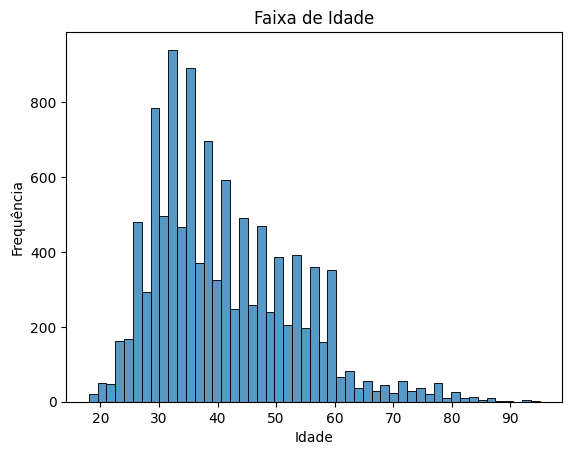

In [4]:
# Distribuição da idade.
sns.histplot(df_bank['age'])
plt.title('Faixa de Idade')
plt.xlabel('Idade')
plt.ylabel('Frequência')

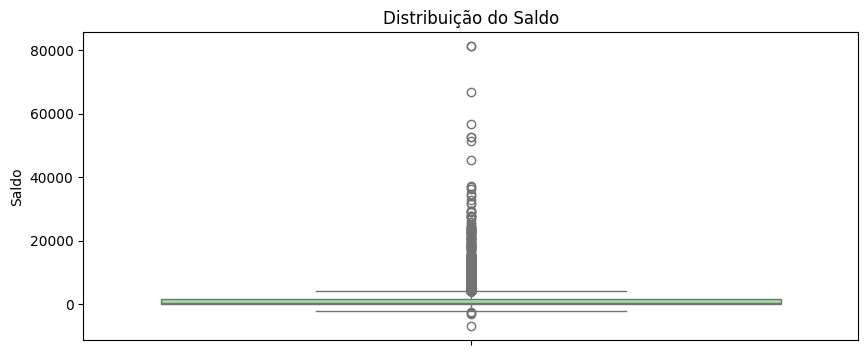

In [5]:
# Distribuição de Saldo.
plt.figure(figsize=(10, 4))
sns.boxplot(df_bank['balance'], color='lightgreen')
plt.title('Distribuição do Saldo')
plt.ylabel('Saldo')
plt.show()

C:\Users\Daniel\AppData\Local\Temp\ipykernel_13020\704977510.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y='job', data=df_bank, order=df_bank['job'].value_counts().index, palette='viridis')


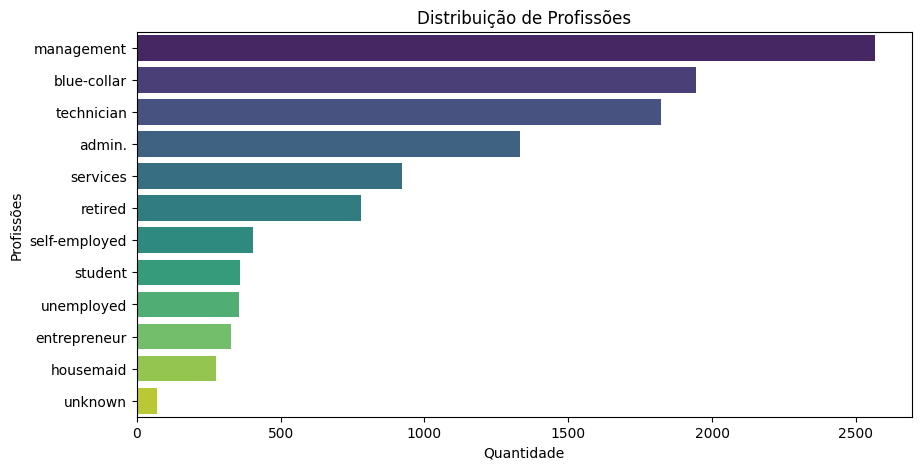

In [6]:
# Frequência de Profissões.
plt.figure(figsize=(10,5))
sns.countplot(y='job', data=df_bank, order=df_bank['job'].value_counts().index, palette='viridis')
plt.title('Distribuição de Profissões')
plt.xlabel('Quantidade')
plt.ylabel('Profissões')
plt.show()

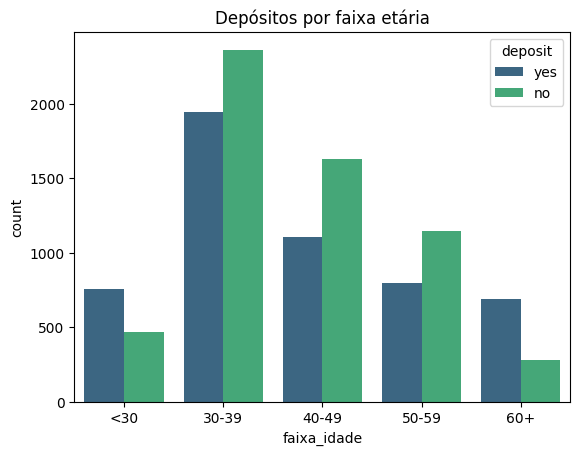

In [7]:
# Depósitos aceitos e não aceitos por faixa de idade.
bins = [0, 29, 39, 49, 59, 100]
labels = ['<30', '30-39', '40-49', '50-59', '60+']

df_bank['faixa_idade'] = pd.cut(df_bank['age'], bins=bins, labels=labels, right=False)

sns.countplot(x='faixa_idade', hue='deposit', data=df_bank, palette='viridis')
plt.title('Depósitos por faixa etária')
plt.show()

In [8]:
deposit_percent_age = df_bank.groupby('faixa_idade')['deposit'].value_counts(normalize=True).unstack() * 100
print(deposit_percent_age)

deposit             no        yes
faixa_idade                      
<30          38.103025  61.896975
30-39        54.891936  45.108064
40-49        59.523810  40.476190
50-59        58.908342  41.091658
60+          28.630705  71.369295


C:\Users\Daniel\AppData\Local\Temp\ipykernel_13020\1486075430.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  deposit_percent_age = df_bank.groupby('faixa_idade')['deposit'].value_counts(normalize=True).unstack() * 100


C:\Users\Daniel\AppData\Local\Temp\ipykernel_13020\3374486457.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='education', data=df_bank, palette='viridis')


Text(0, 0.5, 'Frequência')

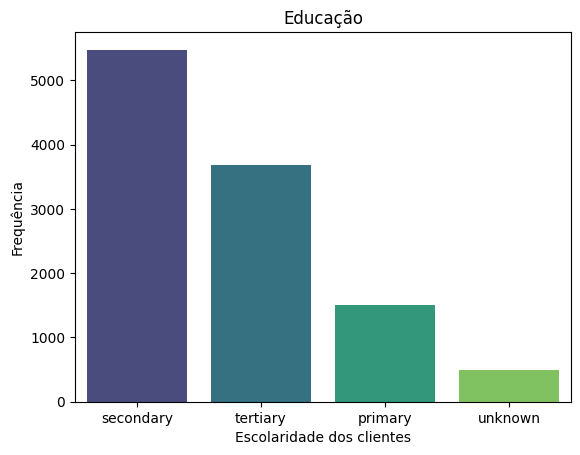

In [9]:
# Frequência de escolaridade dos clientes.
sns.countplot(x='education', data=df_bank, palette='viridis')
plt.title('Educação')
plt.xlabel('Escolaridade dos clientes')
plt.ylabel('Frequência')

deposit           no        yes
education                      
primary    60.600000  39.400000
secondary  55.259313  44.740687
tertiary   45.893196  54.106804
unknown    49.295775  50.704225


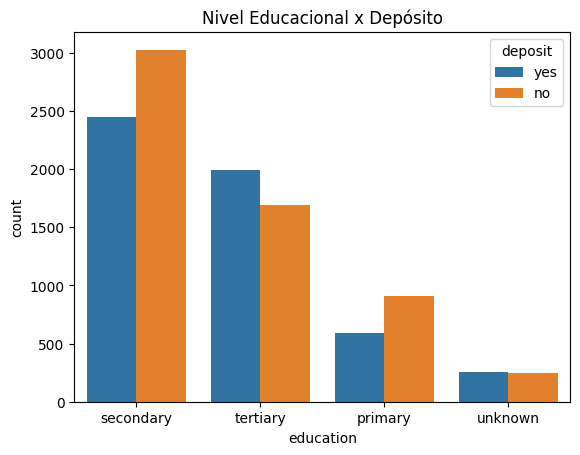

In [14]:
deposit_percent_education = df_bank.groupby('education')['deposit'].value_counts(normalize=True).unstack() * 100
print(deposit_percent_education)

sns.countplot(x='education', hue='deposit', data=df_bank)
plt.title('Nivel Educacional x Depósito')
plt.show()

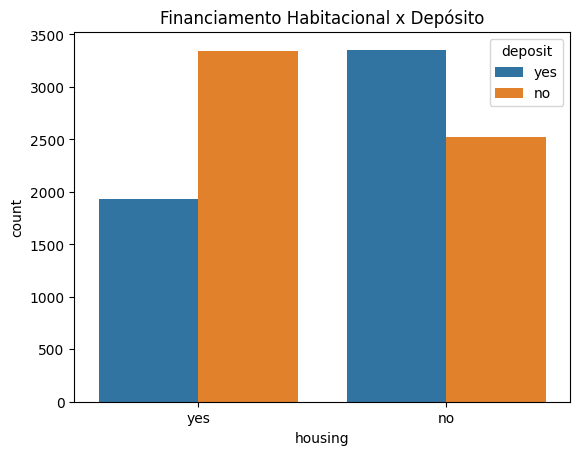

In [11]:
# Tabela cruzada
pd.crosstab(df_bank['housing'], df_bank['deposit'], margins=True, normalize='index') * 100

# Gráfico
sns.countplot(x='housing', hue='deposit', data=df_bank)
plt.title('Financiamento Habitacional x Depósito')
plt.show()